In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv


In [2]:
import pandas as pd
df = pd.read_csv('/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv')
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [3]:
import numpy as np
import sklearn

In [4]:
from sklearn.model_selection import train_test_split
x=df.drop('Class', axis='columns')
y=df['Class']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

In [5]:
import sklearn.ensemble
rnd_forest_model = sklearn.ensemble.RandomForestClassifier()

In [6]:
rnd_forest_model.fit(X_train, y_train)

RandomForestClassifier()

In [7]:
predict = rnd_forest_model.predict(X_test)
predict

array([1, 0, 1, ..., 1, 1, 0])

In [8]:
print(predict)

[1 0 1 ... 1 1 0]


In [9]:
y_test

317609    1
63525     0
473094    1
86238     0
506510    1
         ..
74050     0
235005    0
543251    1
499886    1
103980    0
Name: Class, Length: 227452, dtype: int64

In [10]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, predict)

In [11]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

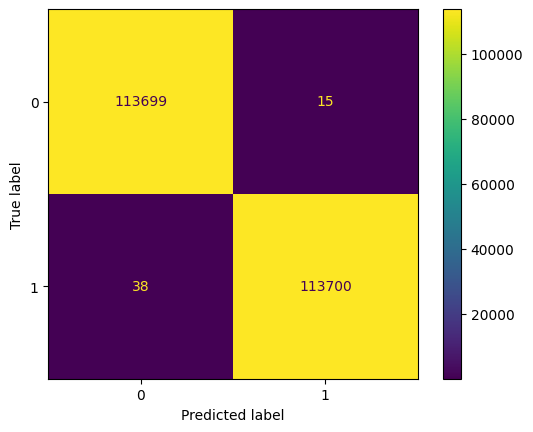

In [12]:
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

In [13]:
rnd_forest_model.score(X_test,y_test)

0.9997669838031761